# Yahoo Finance Web Scrapper
## Introduction
This is a yahoo finance web scrapper with oil and gas analysis. I have noticed some inconsistencies with the scrapped data and the data displayed by Yahoo Finance, however, when comparing the scrapped data with the company's 10k the data does align. Since free cash flow is not GAAP measurement the values should be taken with care. I personally like looking at free cash flow when examining a company's finances. Thanks to Izzy Analytics for the web scrapping tutorial.

## Dataset
The data was obtained via web scrapping.

## Approach/Process
1. Import Libraries
2. Scrape the data from Yahoo Finance
3. Data prepartion
4. Data Visualization
5. Results
6. Review and Reassess

## Results
The Oil and Gas companies were chosen based on their large market cap. I wanted to have a visualization tool to better understand how these companies are rebounding financially from the Covid-19 market crash. With a bit more work the quarterly information can be scrapped too. 


In [18]:
#Import required libraries

import re
import json
import csv
from io import StringIO
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [19]:
# Scraping the data from yahoo finance.

url_stats = 'https://finance.yahoo.com/quote/{}/key-statistics?p={}'
url_profile = 'https://finance.yahoo.com/quote/{}/profile?p={}'
url_financials = 'https://finance.yahoo.com/quote/{}/financials?p={}'

In [20]:
stock = ['XOM','CVX','RDS-A','TOT','BP','COP','EOG','PXD','BKR','OXY']
df = []

In [21]:
for x in range(len(stock)):
    response = requests.get(url_profile.format(stock[x], stock[x]))
    soup = BeautifulSoup(response.text, 'html.parser')
    pattern = re.compile(r'\s--\sData\s--\s')
    script_data = soup.find('script', text = pattern).contents[0]
    start = script_data.find('context')-2
    json_data = json.loads(script_data[start:-12])
    a = json_data['context']['dispatcher']['stores']['QuoteSummaryStore']['summaryDetail']['marketCap']['longFmt']
    # Preparing the data
    a = a.replace(',','')
    df.append(int(a))

In [22]:
# # Market Cap, full number, string fmt

type(json_data['context']['dispatcher']['stores']['QuoteSummaryStore']['summaryDetail']['marketCap']['longFmt'])

str

In [23]:
df

[241607000064,
 199515652096,
 150663659520,
 120695865344,
 85681987584,
 70487580672,
 43131510784,
 32854753280,
 20896872448,
 23341191168]

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

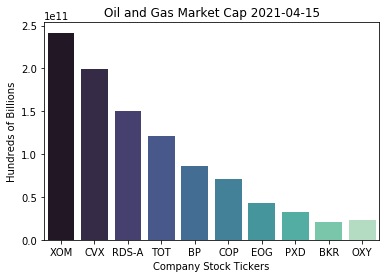

In [25]:
#Data Visualization
#Plot will update and save every time this section of code is run

ax = sns.barplot(x=stock,y=df, palette='mako')
ax.set_title('Oil and Gas Market Cap ' + str(dt.date.today()))
ax.set_ylabel('Hundreds of Billions')
ax.set_xlabel('Company Stock Tickers')
plt.savefig(str(dt.date.today()) + '.png')

In [28]:
# More web scrapping and data formating

stock = ['XOM','CVX','RDS-A','TOT','BP','COP','EOG','PXD','BKR','OXY']
df1 = []

for x in range(len(stock)):
    response = requests.get(url_financials.format(stock[x], stock[x]))
    soup = BeautifulSoup(response.text, 'html.parser')
    pattern = re.compile(r'\s--\sData\s--\s')
    script_data = soup.find('script', text = pattern).contents[0]
    start = script_data.find('context')-2
    json_data = json.loads(script_data[start:-12])
    b = json_data['context']['dispatcher']['stores']['QuoteSummaryStore']['cashflowStatementHistory']['cashflowStatements'][0:1][0]['totalCashFromOperatingActivities']['raw']
    df1.append(int(b))

In [29]:
df1

[14668000000,
 10577000000,
 34105000000,
 14803000000,
 12162000000,
 4802000000,
 5007783000,
 2083000000,
 1304000000,
 3955000000]

In [30]:
stock = ['XOM','CVX','RDS-A','TOT','BP','COP','EOG','PXD','BKR','OXY']
#stock = ['OXY']
df2 = []

for x in range(len(stock)):
    response = requests.get(url_financials.format(stock[x], stock[x]))
    soup = BeautifulSoup(response.text, 'html.parser')
    pattern = re.compile(r'\s--\sData\s--\s')
    script_data = soup.find('script', text = pattern).contents[0]
    start = script_data.find('context')-2
    json_data = json.loads(script_data[start:-12])
    b = json_data['context']['dispatcher']['stores']['QuoteSummaryStore']['cashflowStatementHistory']['cashflowStatements'][0:1][0]['capitalExpenditures']['raw']
    df2.append(int(b))

In [31]:
df2

[-17282000000,
 -8922000000,
 -16585000000,
 -10764000000,
 -12306000000,
 -4715000000,
 -3464700000,
 -1602000000,
 -974000000,
 -2535000000]

In [32]:
stock = ['XOM','CVX','RDS-A','TOT','BP','COP','EOG','PXD','BKR','OXY']
#stock = ['OXY']
df3 = []

for x in range(len(stock)):
    response = requests.get(url_financials.format(stock[x], stock[x]))
    soup = BeautifulSoup(response.text, 'html.parser')
    pattern = re.compile(r'\s--\sData\s--\s')
    script_data = soup.find('script', text = pattern).contents[0]
    start = script_data.find('context')-2
    json_data = json.loads(script_data[start:-12])
    b = json_data['context']['dispatcher']['stores']['QuoteSummaryStore']['cashflowStatementHistory']['cashflowStatements'][0:1][0]['netIncome']['raw']
    df3.append(int(b))

In [33]:
df3

[-22440000000,
 -5543000000,
 -21680000000,
 -7242000000,
 -20305000000,
 -2701000000,
 -604572000,
 -200000000,
 -9940000000,
 -14831000000]

In [34]:
# List Comprehension, (Net Cash from Operating Activities - Capital Expenditures) 
free_cash_flow = [x + y for x, y in zip(df1, df2)] # x + y because capital expenditure values are already negative
free_cash_flow

[-2614000000,
 1655000000,
 17520000000,
 4039000000,
 -144000000,
 87000000,
 1543083000,
 481000000,
 330000000,
 1420000000]

In [35]:
# Results Table
# Pandas Datframe

df_final = pd.DataFrame()
df_final['Company Ticker'] = stock
df_final['Net Income'] = df3
df_final['Free Cash Flow'] = free_cash_flow
df_final

,Company Ticker,Net Income,Free Cash Flow
0,XOM,-22440000000,-2614000000
1,CVX,-5543000000,1655000000
2,RDS-A,-21680000000,17520000000
3,TOT,-7242000000,4039000000
4,BP,-20305000000,-144000000
5,COP,-2701000000,87000000
6,EOG,-604572000,1543083000
7,PXD,-200000000,481000000
8,BKR,-9940000000,330000000
9,OXY,-14831000000,1420000000


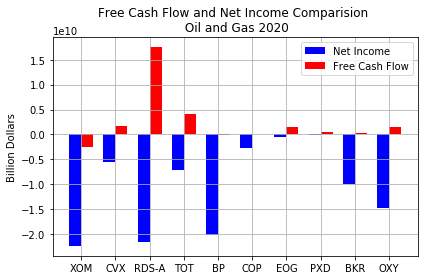

In [36]:
# Bar Chart comparing free cash flow and net income. Based on standard Matplotlib code for comparison bar charts.

x = np.arange(len(stock))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
net_inc = ax.bar(x - width/2, df_final['Net Income'], width, label='Net Income', color='blue')
fcf = ax.bar(x + width/2, df_final['Free Cash Flow'], width, label='Free Cash Flow', color='red')

ax.set_ylabel('Billion Dollars')
ax.set_title('Free Cash Flow and Net Income Comparision \n Oil and Gas 2020')
ax.set_xticks(x)
ax.set_xticklabels(stock)
ax.grid()
ax.legend()

fig.tight_layout()
plt.show()